## Business Understanding

### 1.1 Problem Statement
Airlines experience fluctuating passenger demand due to seasonal patterns, economic factors, and travel behavior changes. Accurate demand forecasting helps airlines optimize flight schedules, pricing, and resource allocation.

This project aims to **forecast future airline passenger demand** using historical flight data. By analyzing time-based patterns, we can identify trends, seasonality, and other factors influencing air travel volume.

---

### 1.2 Objective
To build a **time series forecasting model** that predicts the **number of passengers** over future time periods (monthly or daily).  
The goal is to enable data-driven planning for:
- Flight scheduling  
- Crew and resource management  
- Ticket pricing strategies  

---

### 1.3 Key Questions
- How has airline passenger demand changed over time?  
- Are there visible seasonal trends (e.g., holidays, vacation months)?  
- Which airlines show the most consistent growth or decline in demand?  
- Which forecasting model (ARIMA, Prophet, or LSTM) provides the most accurate predictions?

---

### 1.4 Expected Outcome
- A **forecast chart** showing predicted passenger demand for the next 6–12 months.  
- **Insights** into patterns such as trends, seasonality, and volatility.  
- A **report summary** comparing model accuracy and recommending the best forecasting approach.


## Data Understanding

In this step, we explore the dataset to understand its structure, key variables, and the overall time range covered.  
We also prepare the `Departure_Time` column for time series analysis by converting it to a proper datetime format and extracting date components.


In [1]:
# Step 2: Data Understanding

import pandas as pd

# Load the dataset
df = pd.read_csv("synthetic_flight_passenger_data.csv")

# Convert Departure_Time to datetime format
df['Departure_Time'] = pd.to_datetime(df['Departure_Time'])

# Extract additional time features
df['Year'] = df['Departure_Time'].dt.year
df['Month'] = df['Departure_Time'].dt.month
df['Date'] = df['Departure_Time'].dt.date

# Dataset overview
overview = {
    "Total Rows": len(df),
    "Total Columns": len(df.columns),
    "Date Range": f"{df['Departure_Time'].min().date()} to {df['Departure_Time'].max().date()}",
    "Unique Airlines": df['Airline'].nunique(),
    "Departure Airports": df['Departure_Airport'].nunique(),
    "Arrival Airports": df['Arrival_Airport'].nunique(),
}

overview


{'Total Rows': 10000,
 'Total Columns': 27,
 'Date Range': '2023-04-23 to 2025-04-22',
 'Unique Airlines': 5,
 'Departure Airports': 8,
 'Arrival Airports': 8}

## Data Preparation

Now that we understand the structure of our dataset, the next step is to prepare it for time series analysis.  
We will:
1. Create a daily or monthly aggregation of total passengers.
2. Handle missing values (if any).
3. Sort data by date to maintain chronological order.
4. Visualize the number of flights or passengers over time to confirm temporal patterns.


C:\Users\hp\AppData\Local\Temp\ipykernel_1608\3939694237.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_passengers = daily_passengers['Total_Passengers'].resample('M').sum()


Daily passengers:
                 Total_Passengers
Departure_Time                  
2023-04-23                    12
2023-04-24                    10
2023-04-25                    16
2023-04-26                    15
2023-04-27                    15

Monthly passengers:
 Departure_Time
2023-04-30    112
2023-05-31    429
2023-06-30    379
2023-07-31    433
2023-08-31    415
Freq: ME, Name: Total_Passengers, dtype: int64


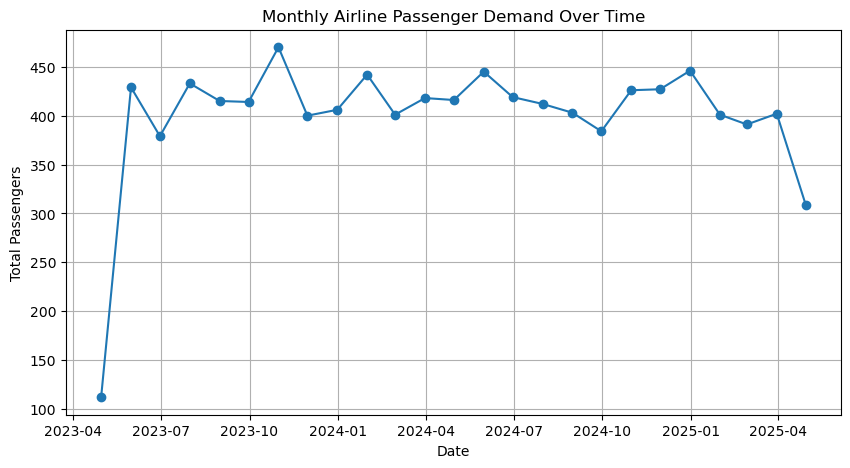

In [2]:
# Step 3: Data Preparation

import pandas as pd
import matplotlib.pyplot as plt

# Ensure Departure_Time is in datetime format
df['Departure_Time'] = pd.to_datetime(df['Departure_Time'])

# Create a daily passenger count (assuming each Passenger_ID = one passenger)
daily_passengers = (
    df.groupby(df['Departure_Time'].dt.date)
    .agg({'Passenger_ID': 'count'})
    .rename(columns={'Passenger_ID': 'Total_Passengers'})
    .reset_index()
)

# Convert 'Departure_Time' to datetime for plotting and resampling
daily_passengers['Departure_Time'] = pd.to_datetime(daily_passengers['Departure_Time'])

# Set as time series index
daily_passengers.set_index('Departure_Time', inplace=True)

# Resample to get monthly totals
monthly_passengers = daily_passengers['Total_Passengers'].resample('M').sum()

# Preview data
print("Daily passengers:\n", daily_passengers.head())
print("\nMonthly passengers:\n", monthly_passengers.head())

# Plot passenger trends
plt.figure(figsize=(10,5))
plt.plot(monthly_passengers, marker='o')
plt.title("Monthly Airline Passenger Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Total Passengers")
plt.grid(True)
plt.show()
